In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mog_experiment import *
%matplotlib notebook

In [204]:
data_dir = '../log_mog_tf/run63/run_info/'
figs_dir = '../log_mog_tf/run63/figures/'

In [292]:
with open(data_dir + 'tunneling_rates.pkl', 'rb') as f:
    tunneling_rates = pickle.load(f)
with open(data_dir + 'acceptance_rates.pkl', 'rb') as f:
    acceptance_rates = pickle.load(f)
with open(data_dir + 'tunneling_rates_highT.pkl', 'rb') as f:
    tunneling_rates_highT = pickle.load(f)
with open(data_dir + 'acceptance_rates_highT.pkl', 'rb') as f:
    acceptance_rates_highT = pickle.load(f)

In [313]:
tunneling_rates_avg = np.load(data_dir + 'tunneling_rates_avg.npy')
tunneling_rates_err = np.load(data_dir + 'tunneling_rates_err.npy')

acceptance_rates_avg = np.load(data_dir + 'acceptance_rates_avg.npy')
acceptance_rates_err = np.load(data_dir + 'acceptance_rates_err.npy')
    
tunneling_rates_avg_highT = np.load(data_dir + 'tunneling_rates_avg_highT.npy')
tunneling_rates_err_highT = np.load(data_dir + 'tunneling_rates_err_highT.npy')

acceptance_rates_avg_highT = np.load(data_dir + 'acceptance_rates_avg_highT.npy')
acceptance_rates_err_highT = np.load(data_dir + 'acceptance_rates_err_highT.npy')

temp_arr = np.load(data_dir + 'temp_array.npy')
steps_arr = np.load(data_dir + 'steps_array.npy')

<IPython.core.display.Javascript object>


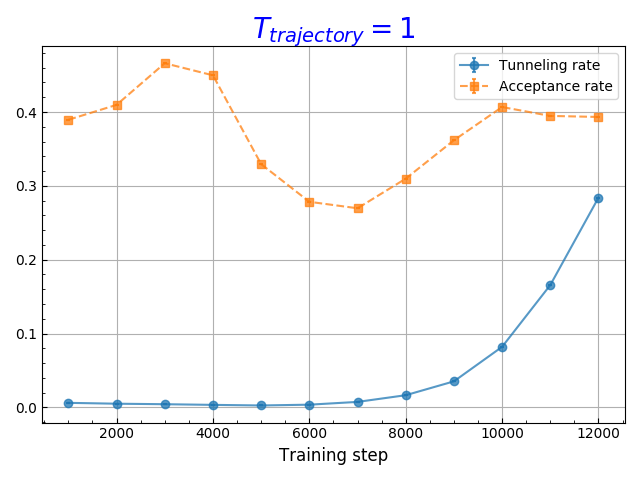

In [314]:
fig, ax = plt.subplots()
eb0 = ax.errorbar(steps_arr, tunneling_rates_avg, yerr=tunneling_rates_err,
                 color='C0', marker='o', ls='-', fillstyle='full',
                 label='Tunneling rate',#, $T_{trajectory} = 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb1 = ax.errorbar(steps_arr, acceptance_rates_avg, yerr=acceptance_rates_err,
                 color='C1', marker='s', ls='--', fillstyle='full',
                 label='Acceptance rate',
                 capsize=1.5, capthick=1.5, alpha=0.75)
#ax.axhline(y=1., color='slategrey', ls='-')
#ax.text(23500, 0.03, r'$T_{trajectory} = 1$', fontsize=20, color='b')
title = ax.set_title(r'$T_{trajectory} = 1$', fontsize=20, color='b')

xlabel = ax.set_xlabel('Training step', fontsize=12)
grid = ax.grid(True)

legend = ax.legend(loc='best', fontsize=10)
fig.tight_layout()
plt.show()
out_fig = plt.savefig(figs_dir + 'tunneling_rate_acceptance_rate_training_step_T1.pdf', 
            dpi=400, bbox_inches='tight')

<IPython.core.display.Javascript object>


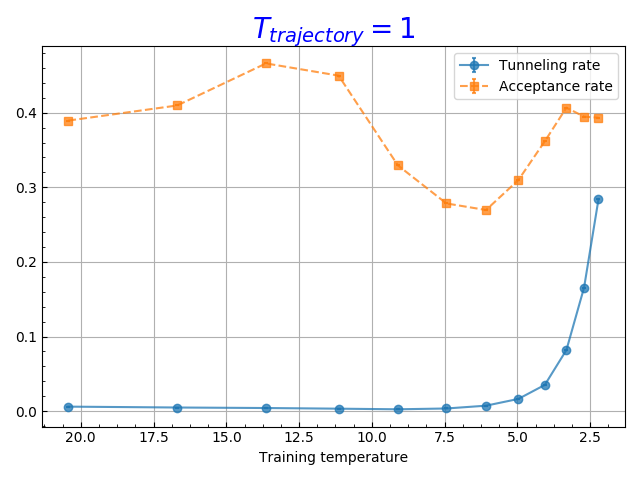

In [304]:
fig, ax = plt.subplots()
eb = ax.errorbar(temp_arr, tunneling_rates_avg, yerr=tunneling_rates_err,
                 color='C0', marker='o', ls='-', fillstyle='full',
                 label='Tunneling rate',#, $T_{trajectory} = 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb = ax.errorbar(temp_arr, acceptance_rates_avg, yerr=acceptance_rates_err,
                 color='C1', marker='s', ls='--', fillstyle='full',
                 label='Acceptance rate',
                 capsize=1.5, capthick=1.5, alpha=0.75)
#ax.axhline(y=1., color='slategrey', ls='-')
#ax.text(18.3, 0.6, r'$T_{trajectory} = 1$', fontsize=20, color='b')
title = ax.set_title(r'$T_{trajectory} = 1$', fontsize=20, color='b')

xlabel = ax.set_xlabel('Training temperature', fontsize=12)
xlim = ax.set_xlim(ax.get_xlim()[::-1])
grid = ax.grid(True)

legend = ax.legend(loc='best', fontsize=10)
fig.tight_layout()
out_fig = plt.savefig(figs_dir + '/tunneling_rate_acceptance_rate_training_temp_T1.pdf', 
            dpi=400, bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


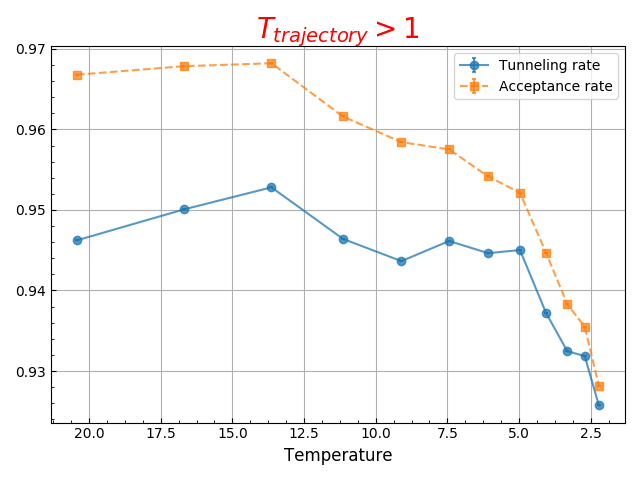

In [315]:
fig, ax = plt.subplots()
eb = ax.errorbar(temp_arr, tunneling_rates_avg_highT, yerr=tunneling_rates_err_highT,
                 color='C0', marker='o', ls='-', fillstyle='full',
                 label='Tunneling rate',#, $T_{trajectory} = 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb = ax.errorbar(temp_arr, acceptance_rates_avg_highT, yerr=acceptance_rates_err_highT,
                 color='C1', marker='s', ls='--', fillstyle='full',
                 label='Acceptance rate',
                 capsize=1.5, capthick=1.5, alpha=0.75)
title = ax.set_title(r'$T_{trajectory} > 1$', fontsize=20, color='r')
xlabel = ax.set_xlabel('Temperature', fontsize=12)
xlim = ax.set_xlim(ax.get_xlim()[::-1])
grid = ax.grid(True)

legend = ax.legend(loc='best', fontsize=10)
fig.tight_layout()
out_fig = plt.savefig(figs_dir + 'tunneling_rate_acceptance_rate_training_temp_highT.pdf', 
                      dpi=400, bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


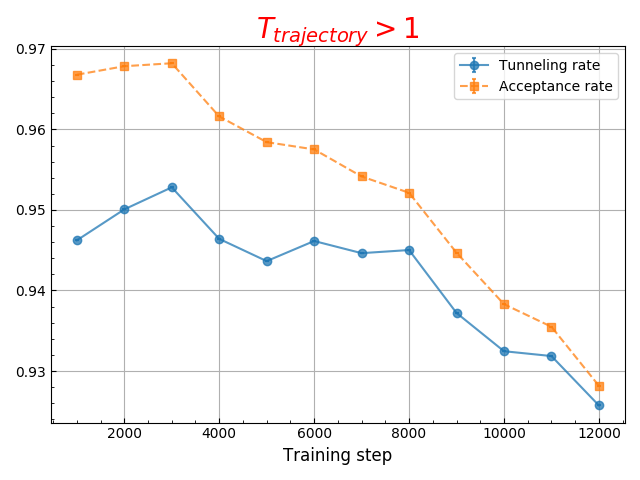

In [316]:
fig, ax = plt.subplots()
eb = ax.errorbar(steps_arr, tunneling_rates_avg_highT, yerr=tunneling_rates_err_highT,
                 color='C0', marker='o', ls='-', fillstyle='full',
                 label='Tunneling rate',#, $T_{trajectory} = 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb = ax.errorbar(steps_arr, acceptance_rates_avg_highT, yerr=acceptance_rates_err_highT,
                 color='C1', marker='s', ls='--', fillstyle='full',
                 label='Acceptance rate',
                 capsize=1.5, capthick=1.5, alpha=0.75)
title = ax.set_title(r'$T_{trajectory} > 1$', fontsize=20, color='r')
xlabel = ax.set_xlabel('Training step',fontsize=12)
grid = ax.grid(True)
legend = ax.legend(loc='best', fontsize=10)
fig.tight_layout()
out_fig = plt.savefig(figs_dir + 'tunneling_rate_acceptance_rate_training_step_highT.pdf', 
            dpi=400, bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


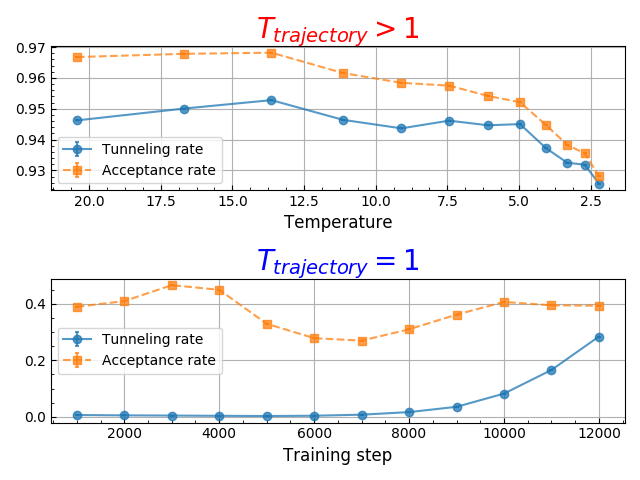

In [317]:
fig, axes = plt.subplots(2)
eb = axes[1].errorbar(steps_arr, tunneling_rates_avg, yerr=tunneling_rates_err,
                      color='C0', marker='o', ls='-', fillstyle='full',
                      label='Tunneling rate',#, $T_{trajectory} = 1$',
                      capsize=1.5, capthick=1.5, alpha=0.75)
eb1 = axes[1].errorbar(steps_arr, acceptance_rates_avg, yerr=acceptance_rates_err,
                       color='C1', marker='s', ls='--', fillstyle='full',
                       label='Acceptance rate',
                       capsize=1.5, capthick=1.5, alpha=0.75)
title = axes[1].set_title(r'$T_{trajectory} = 1$', fontsize=20, color='b')
xlabel = axes[1].set_xlabel('Training step', fontsize=12)
grid = axes[1].grid(True)
leg = axes[1].legend(loc='best', fontsize=10)

eb2 = axes[0].errorbar(temp_arr, tunneling_rates_avg_highT, yerr=tunneling_rates_err_highT,
                       color='C0', marker='o', ls='-', fillstyle='full',
                       label='Tunneling rate',
                       capsize=1.5, capthick=1.5, alpha=0.75)
eb3 = axes[0].errorbar(temp_arr, acceptance_rates_avg_highT, yerr=acceptance_rates_err_highT,
                       color='C1', marker='s', ls='--', fillstyle='full',
                       label='Acceptance rate',
                       capsize=1.5, capthick=1.5, alpha=0.75)
xlim = axes[0].set_xlim(axes[0].get_xlim()[::-1])
title = axes[0].set_title('$T_{trajectory} > 1$', fontsize=20, color='r')
xlabel = axes[0].set_xlabel('Temperature', fontsize=12)
legend = axes[0].legend(loc='best', fontsize=10)
grid = axes[0].grid(True)
fig.tight_layout()
out_fig = plt.savefig(figs_dir + 'tunneling_rate_acceptance_rate_both1.pdf', 
            dpi=400, bbox_inches='tight')

<IPython.core.display.Javascript object>


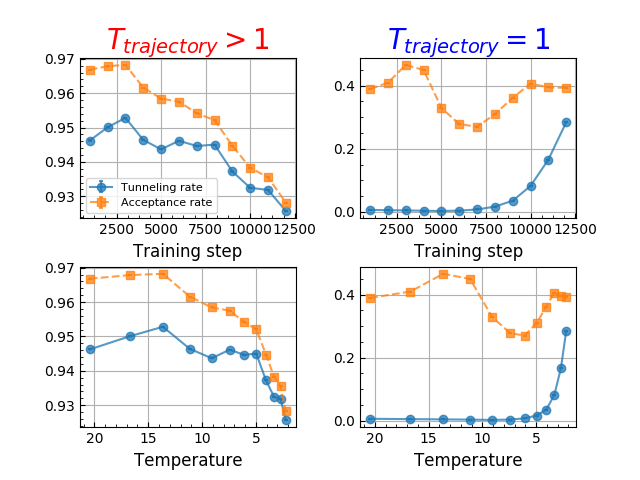

In [318]:
fig, axes = plt.subplots(2,2)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

eb00 = axes[0][1].errorbar(steps_arr, tunneling_rates_avg, yerr=tunneling_rates_err,
                           color='C0', marker='o', ls='-', fillstyle='full',
                           label='Tunneling rate',#, $T_{trajectory} = 1$',
                           capsize=1.5, capthick=1.5, alpha=0.75)
eb01 = axes[0][1].errorbar(steps_arr, acceptance_rates_avg, yerr=acceptance_rates_err,
                           color='C1', marker='s', ls='--', fillstyle='full',
                           label='Acceptance rate',
                           capsize=1.5, capthick=1.5, alpha=0.75)
xlab = axes[0][1].set_xlabel('Training step', fontsize=12)
tit = axes[0][1].set_title('$T_{trajectory} = 1$', fontsize=20, color='b')#, y=1.15)
grid = axes[0][1].grid(True)
#leg0 = axes[0][1].legend(loc='best', fontsize=8)

eb10 = axes[1][1].errorbar(temp_arr, tunneling_rates_avg, yerr=tunneling_rates_err,
                           color='C0', marker='o', ls='-', fillstyle='full',
                           label='Tunneling rate',
                           capsize=1.5, capthick=1.5, alpha=0.75)
eb11 = axes[1][1].errorbar(temp_arr, acceptance_rates_avg, yerr=acceptance_rates_err,
                           color='C1', marker='s', ls='--', fillstyle='full',
                           label='Acceptance rate',
                           capsize=1.5, capthick=1.5, alpha=0.75)
eb12 = axes[1][1].set_xlim(axes[1][1].get_xlim()[::-1])
xlab = axes[1][1].set_xlabel('Temperature', fontsize=12)
#leg = axes[1][1].legend(loc='best', fontsize=8)
grid = axes[1][1].grid(True)

eb12 = axes[0][0].errorbar(steps_arr, tunneling_rates_avg_highT, yerr=tunneling_rates_err_highT,
                           color='C0', marker='o', ls='-', fillstyle='full',
                           label='Tunneling rate',#, $T_{trajectory} = 1$',
                           capsize=1.5, capthick=1.5, alpha=0.75)
eb13 = axes[0][0].errorbar(steps_arr, acceptance_rates_avg_highT, yerr=acceptance_rates_err_highT,
                           color='C1', marker='s', ls='--', fillstyle='full',
                           label='Acceptance rate',
                           capsize=1.5, capthick=1.5, alpha=0.75)
xlab = axes[0][0].set_xlabel('Training step', fontsize=12)
tit = axes[0][0].set_title('$T_{trajectory} > 1$', fontsize=20, color='r')#, y=1.15)
grid = axes[0][0].grid(True)
leg = axes[0][0].legend(loc='best', fontsize=8)

eb22 = axes[1][0].errorbar(temp_arr, tunneling_rates_avg_highT, yerr=tunneling_rates_err_highT,
                           color='C0', marker='o', ls='-', fillstyle='full',
                           #label='Tunneling rate',
                           capsize=1.5, capthick=1.5, alpha=0.75)
eb23 = axes[1][0].errorbar(temp_arr, acceptance_rates_avg_highT, yerr=acceptance_rates_err_highT,
                           color='C1', marker='s', ls='--', fillstyle='full',
                           #label='Acceptance rate',
                           capsize=1.5, capthick=1.5, alpha=0.75)
eb33 = axes[1][0].set_xlim(axes[1][0].get_xlim()[::-1])
_ = axes[1][0].set_xlabel('Temperature', fontsize=12)
#_ = axes[1][0].legend(loc='best', fontsize=8)
_ = axes[1][0].grid(True)
#_ = fig.legend(loc='best', fontsize=8)
#_ = fig.legend(bbox_to_anchor=(0.62, 0.52), borderaxespad=0., fontsize=9)

out_fig = plt.savefig(figs_dir + 'tunneling_rate_acceptance_rate_all.pdf',
            dpi=400, bbox_inches='tight')

<IPython.core.display.Javascript object>


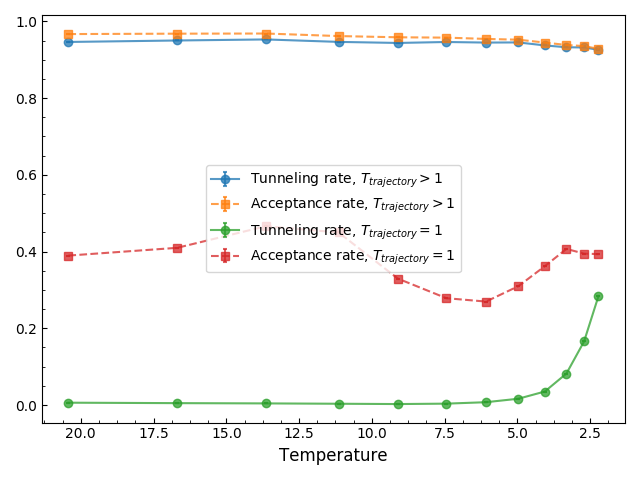

In [319]:
fig, ax = plt.subplots()
eb = ax.errorbar(temp_arr, tunneling_rates_avg_highT, yerr=tunneling_rates_err_highT,
                 color='C0', marker='o', ls='-', fillstyle='full',
                 label='Tunneling rate, $T_{trajectory} > 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb = ax.errorbar(temp_arr, acceptance_rates_avg_highT, yerr=acceptance_rates_err_highT,
                 color='C1', marker='s', ls='--', fillstyle='full',
                 label='Acceptance rate, $T_{trajectory} > 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb = ax.errorbar(temp_arr, tunneling_rates_avg, yerr=tunneling_rates_err,
                 color='C2', marker='o', ls='-', fillstyle='full',
                 label='Tunneling rate, $T_{trajectory} = 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb = ax.errorbar(temp_arr, acceptance_rates_avg, yerr=acceptance_rates_err,
            color='C3', marker='s', ls='--', fillstyle='full',
            label='Acceptance rate, $T_{trajectory} = 1$',
            capsize=1.5, capthick=1.5, alpha=0.75)
xlabel = ax.set_xlabel('Temperature', fontsize=12)
xlim = ax.set_xlim(ax.get_xlim()[::-1])
legend = ax.legend(loc='best')#, fontsize=9)#, alpha=0.6)
fig.tight_layout()
out_fig = plt.savefig(figs_dir + 'tunneling_rate_acceptance_rate_vs_temp_all1.pdf', 
            dpi=400, bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


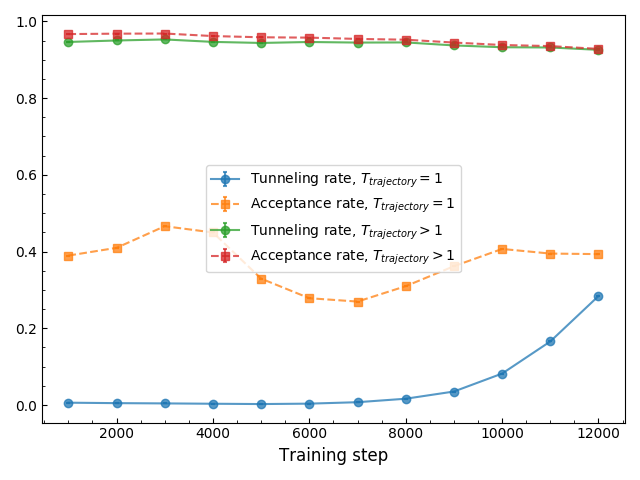

In [320]:
fig, ax = plt.subplots()
eb = ax.errorbar(steps_arr, tunneling_rates_avg, yerr=tunneling_rates_err,
                 color='C0', marker='o', ls='-', fillstyle='full',
                 label='Tunneling rate, $T_{trajectory} = 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb = ax.errorbar(steps_arr, acceptance_rates_avg, yerr=acceptance_rates_err,
                 color='C1', marker='s', ls='--', fillstyle='full',
                 label='Acceptance rate, $T_{trajectory} = 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb = ax.errorbar(steps_arr, tunneling_rates_avg_highT, yerr=tunneling_rates_err_highT,
                 color='C2', marker='o', ls='-', fillstyle='full',
                 label='Tunneling rate, $T_{trajectory} > 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb = ax.errorbar(steps_arr, acceptance_rates_avg_highT, yerr=acceptance_rates_err_highT,
                 color='C3', marker='s', ls='--', fillstyle='full',
                 label='Acceptance rate, $T_{trajectory} > 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
xlabel = ax.set_xlabel('Training step', fontsize=12)
#xlim = ax.set_xlim(ax.get_xlim()[::-1])
legend = ax.legend(loc='best')#, fontsize=9)#, alpha=0.6)
fig.tight_layout()
out_fig = plt.savefig(figs_dir + 'tunneling_rate_acceptance_rate_vs_step_all1.pdf', 
            dpi=400, bbox_inches='tight')
plt.show()